In [1]:
#pip install python-binance

In [2]:
import pandas as pd
from binance.client import Client
import datetime as dt

#client configuration
api_key = 'API HERE'
api_secret = 'SECRET API HERE'
client = Client(api_key, api_secret)

<AxesSubplot:title={'center':'JASMY'}>

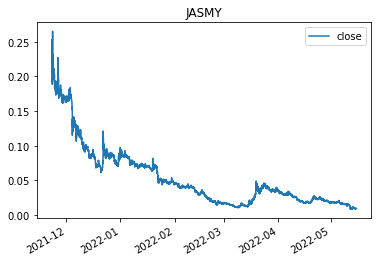

In [5]:
symbol = 'JASMYUSDT'
interval ='15m'

Client.KLINE_INTERVAL_15MINUTE

klines = client.get_historical_klines(symbol,interval,"1 Jan, 2021")

data = pd.DataFrame(klines)

#create column name

data.columns = ['open_time','open','high', 'low', 'close', 'volume',
               'close_time','gav','num_trades','taker_base_vol',
               'taker_quote_vol','ignore']

#change the time stamp
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.close_time]

data.to_csv(symbol+'.csv', index=None, header=True)

#convert data to float and plot
df=data.astype(float)
df['close'].plot(title='JASMY', legend='close')


In [6]:
import seaborn as sns
import pandas as pd

jasmy = pd.read_csv('JASMYUSDT.csv')

jasmy.describe()

,open_time,open,high,low,close,volume,close_time,gav,num_trades,taker_base_vol,taker_quote_vol,ignore
count,1.666200e+04,16662.000000,16662.000000,16662.000000,16662.000000,1.666200e+04,1.666200e+04,1.666200e+04,16662.000000,1.666200e+04,1.666200e+04,16662.0
mean,1.645080e+12,0.053350,0.053757,0.052950,0.053341,2.471016e+07,1.645081e+12,6.809035e+05,1172.382727,1.208359e+07,3.335938e+05,0.0
std,4.329044e+09,0.044203,0.044640,0.043843,0.044198,5.390497e+07,4.329044e+09,1.573626e+06,2404.834552,2.798805e+07,8.140073e+05,0.0
min,1.637582e+12,0.008500,0.008809,0.008200,0.008500,8.929000e+02,1.637583e+12,1.000048e+01,1.000000,0.000000e+00,0.000000e+00,0.0
25%,1.641331e+12,0.019900,0.020100,0.019800,0.019900,1.400872e+06,1.641332e+12,9.169628e+04,227.000000,6.248175e+05,3.910169e+04,0.0
50%,1.645080e+12,0.038350,0.038800,0.037800,0.038300,6.233438e+06,1.645081e+12,2.192981e+05,468.000000,2.677535e+06,9.988864e+04,0.0
75%,1.648829e+12,0.073300,0.073800,0.072800,0.073300,2.452955e+07,1.648829e+12,6.033015e+05,1136.750000,1.156708e+07,2.875581e+05,0.0
max,1.652577e+12,0.265100,0.364900,0.250000,0.265000,1.378931e+09,1.652578e+12,5.031286e+07,101551.000000,7.539999e+08,2.554606e+07,0.0


In [8]:
jasmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16662 entries, 0 to 16661
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   open_time        16662 non-null  int64  
 1   open             16662 non-null  float64
 2   high             16662 non-null  float64
 3   low              16662 non-null  float64
 4   close            16662 non-null  float64
 5   volume           16662 non-null  float64
 6   close_time       16662 non-null  int64  
 7   gav              16662 non-null  float64
 8   num_trades       16662 non-null  int64  
 9   taker_base_vol   16662 non-null  float64
 10  taker_quote_vol  16662 non-null  float64
 11  ignore           16662 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.5 MB
